In [ ]:
%pip install gurobipy
%pip install matplotlib_scalebar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import gurobipy as gp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
upload = files.upload()

Saving chargingstation_jakpus.xlsx to chargingstation_jakpus.xlsx


In [ ]:
df= pd.read_excel("chargingstation_jakpus.xlsx")

In [ ]:
#df.Demand= df.Demand.str.split(",").str[0]
df.Demand= df.Demand.astype(int)

In [ ]:
import matplotlib
import numpy as np
import math
import gurobipy as gp
import matplotlib.cbook as cbook
from matplotlib import pyplot as plt
from gurobipy import GRB
from matplotlib_scalebar.scalebar import ScaleBar

In [ ]:
df

,No,X_Jalan,Y_Jalan,Nama_Jalan,X_Kelurahan,Y_Kelurahan,Kelurahan,Jarak(meter),Demand
0,322,699229,9314318,K. S. Tubun,700155.135505,9.313393e+06,Bendungan Hilir,1308.689745,5776
1,323,699491,9314443,K. S. Tubun,700155.135505,9.313393e+06,Bendungan Hilir,1242.095211,5776
2,324,704467,9319113,Angkasa,700155.135505,9.313393e+06,Bendungan Hilir,7162.845135,5776
3,325,704088,9319105,Angkasa,700155.135505,9.313393e+06,Bendungan Hilir,6934.706053,5776
4,326,703145,9316276,Arief Rachman Hakim,700155.135505,9.313393e+06,Bendungan Hilir,4153.173399,5776
...,...,...,...,...,...,...,...,...,...
2239,472,704900,9318536,Benyamin Suaeb,705184.387042,9.318159e+06,Utan Panjang,472.508897,8162
2240,473,704792,9319047,Benyamin Suaeb,705184.387042,9.318159e+06,Utan Panjang,971.145232,8162
2241,480,701032,9312646,Jenderal Sudirman,705184.387042,9.318159e+06,Utan Panjang,6901.571689,8162
2242,495,699151,9314021,Gatot Subroto,705184.387042,9.318159e+06,Utan Panjang,7315.870042,8162


In [ ]:
le= LabelEncoder()
df["Kelurahan_encode"]=le.fit_transform(df.Kelurahan)

In [ ]:
imed=df.iloc[0:43]
buat_demand= dict(imed[["Kelurahan_encode", "Demand"]].to_numpy())

In [ ]:
print(buat_demand)

{0: 5776}


In [ ]:
df["price"]=1 # assume all price are the same
df["Jarak(meter)"]= df["Jarak(meter)"].astype(int)

In [ ]:
df

,No,X_Jalan,Y_Jalan,Nama_Jalan,X_Kelurahan,Y_Kelurahan,Kelurahan,Jarak(meter),Demand,Kelurahan_encode,price
0,322,699229,9314318,K. S. Tubun,700155.135505,9.313393e+06,Bendungan Hilir,1308,5776,0,1
1,323,699491,9314443,K. S. Tubun,700155.135505,9.313393e+06,Bendungan Hilir,1242,5776,0,1
2,324,704467,9319113,Angkasa,700155.135505,9.313393e+06,Bendungan Hilir,7162,5776,0,1
3,325,704088,9319105,Angkasa,700155.135505,9.313393e+06,Bendungan Hilir,6934,5776,0,1
4,326,703145,9316276,Arief Rachman Hakim,700155.135505,9.313393e+06,Bendungan Hilir,4153,5776,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2239,472,704900,9318536,Benyamin Suaeb,705184.387042,9.318159e+06,Utan Panjang,472,8162,43,1
2240,473,704792,9319047,Benyamin Suaeb,705184.387042,9.318159e+06,Utan Panjang,971,8162,43,1
2241,480,701032,9312646,Jenderal Sudirman,705184.387042,9.318159e+06,Utan Panjang,6901,8162,43,1
2242,495,699151,9314021,Gatot Subroto,705184.387042,9.318159e+06,Utan Panjang,7315,8162,43,1


In [ ]:
buat_cs= {}
count=0
jarak_maks= 500
for i in df.No.unique():
  df_imed=df[(df["No"]==i) & (df["Jarak(meter)"]<=jarak_maks)]
  buat_cs[count]= [set(df_imed["Kelurahan_encode"].tolist()),1]
  count+=1


In [ ]:
buat_cs

{0: [set(), 1],
 1: [{35}, 1],
 2: [set(), 1],
 3: [{12}, 1],
 4: [{29}, 1],
 5: [set(), 1],
 6: [{5}, 1],
 7: [{5}, 1],
 8: [{11, 25}, 1],
 9: [{11, 25}, 1],
 10: [set(), 1],
 11: [set(), 1],
 12: [{13, 20}, 1],
 13: [{20}, 1],
 14: [set(), 1],
 15: [{32}, 1],
 16: [set(), 1],
 17: [set(), 1],
 18: [set(), 1],
 19: [set(), 1],
 20: [{37}, 1],
 21: [{24}, 1],
 22: [{24}, 1],
 23: [{19}, 1],
 24: [{19}, 1],
 25: [{19}, 1],
 26: [set(), 1],
 27: [set(), 1],
 28: [set(), 1],
 29: [set(), 1],
 30: [set(), 1],
 31: [set(), 1],
 32: [{25}, 1],
 33: [set(), 1],
 34: [{29}, 1],
 35: [{28, 29}, 1],
 36: [{27}, 1],
 37: [set(), 1],
 38: [{11}, 1],
 39: [{11}, 1],
 40: [{39}, 1],
 41: [set(), 1],
 42: [{34}, 1],
 43: [{34}, 1],
 44: [set(), 1],
 45: [set(), 1],
 46: [{23, 43}, 1],
 47: [{23}, 1],
 48: [set(), 1],
 49: [set(), 1],
 50: [set(), 1]}

In [ ]:
# tested with Gurobi v9.0.0 and Python 3.7.0

# Parameters
total= 15
regions, population = gp.multidict(buat_demand)

sites, coverage, jumlah = gp.multidict(buat_cs)

In [ ]:
print(regions)

[0]


In [ ]:
m = gp.Model("cell_tower")

build = m.addVars(len(sites), vtype=GRB.BINARY, name="Build")
is_covered = m.addVars(len(regions), vtype=GRB.BINARY, name="Is_covered")

m.addConstrs((gp.quicksum(build[t] for t in sites if r in coverage[t]) >= is_covered[r]
                        for r in regions), name="Build2cover")
m.addConstr(build.prod(jumlah) == total, name="total")

m.setObjective(is_covered.prod(population), GRB.MAXIMIZE)

m.optimize() 

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 52 columns and 52 nonzeros
Model fingerprint: 0x9b86cd2d
Variable types: 0 continuous, 52 integer (52 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+03, 6e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 2 rows and 52 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: -0 
No other solutions better than -0

Optimal solution found (tolerance 1.00e-04)
Best objective -0.000000000000e+00, best bound -0.000000000000e+00, gap 0.0000%


In [ ]:
cs_real_val= list(df.No.unique())

for tower in build.keys():
    if (abs(build[tower].x) > 1e-6):
        print(f" Build a charging station tower at location Tower {cs_real_val[tower]}.")


 Build a charging station tower at location Tower 359.
 Build a charging station tower at location Tower 360.
 Build a charging station tower at location Tower 361.
 Build a charging station tower at location Tower 362.
 Build a charging station tower at location Tower 363.
 Build a charging station tower at location Tower 364.
 Build a charging station tower at location Tower 365.
 Build a charging station tower at location Tower 366.
 Build a charging station tower at location Tower 464.
 Build a charging station tower at location Tower 465.
 Build a charging station tower at location Tower 472.
 Build a charging station tower at location Tower 473.
 Build a charging station tower at location Tower 480.
 Build a charging station tower at location Tower 495.
 Build a charging station tower at location Tower 496.


In [ ]:
# Percentage of the population covered by the cell towers built is computed as follows.

total_population = 0

for region in range(len(regions)):
    total_population += population[region]

coverage = round(100*m.objVal/total_population, 2)

print(f"\n The population coverage associated to the cell towers build plan is: {coverage} %")




 The population coverage associated to the cell towers build plan is: -0.0 %


In [ ]:
# Percentage of budget consumed to build cell towers

total_jumlah = 0

for tower in range(len(sites)):
    if (abs(build[tower].x) > 0.5):
        total_jumlah += jumlah[tower]*int(build[tower].x)

budget_consumption = round(100*total_jumlah/total, 2)

print(f"\n The percentage of budget consumed associated to the cell towers build plan is: {budget_consumption} %")


 The percentage of budget consumed associated to the cell towers build plan is: 100.0 %


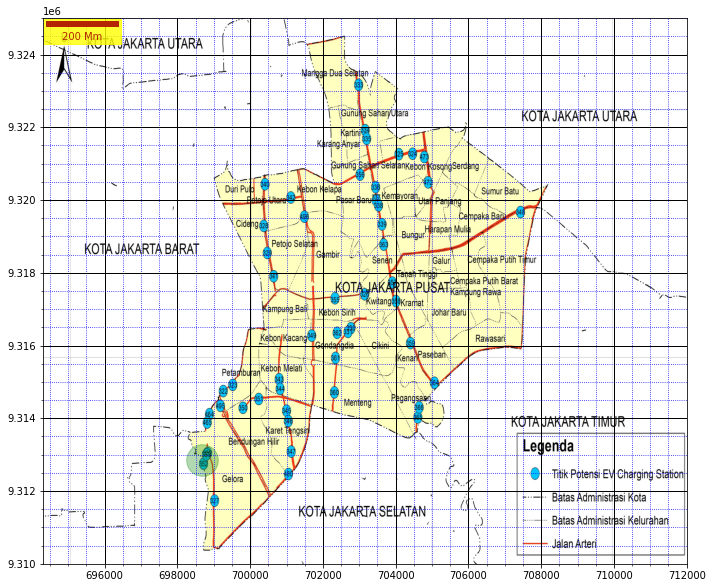

In [ ]:
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("PETA1.jpg")
fig, ax = plt.subplots()
#im = ax.imshow(im, extent=[0, 1188, 0, 1066])
im = ax.imshow(im, extent=[694300, 712000, 9310000, 9325000])
#x = np.array(range(300))
#ax.plot(x, x, ls='dotted', linewidth=2, color='red')


# plotting points as a scatter plot
# A = [106.91366, -6.19676], B = [106.92372, -6.18988], C = [106.92421, -6.18620]
# G = [106.94280, -6.18820], I = [106.96050, -6.18950] J = [106.96280, -6.19060]
# N = [106.92480, -6.18380], R = [106.95890, -6.19700]
# X = [106.94395, -6.18550]


x = [698683]

y = [9312853]
plt.scatter(x, y, label= "circle", color= "green",marker= ".", s= 4*10**3, alpha = 0.3)
# s= 1.2*10**5


ax.grid(which='major', color = "black", linewidth = 1)
ax.grid(which='minor', color = "blue" , linestyle=':', linewidth=0.8)
ax.minorticks_on()
scalebar = ScaleBar(10**5, location = "upper left", color='#b32400', box_color='yellow', box_alpha=0.8) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.show()